## Aprendizaje Automático Supervisado

## 3º GrIA, USC

# Práctica 2: Máquinas de Vectores de Soporte

Este fichero Notebook contiene la solución del siguiente equipo al guion de prácticas proporcionado en el Aula Virtual de la asignatura.

Miembros del equipo:
- _Estudiante1_: Mateo, Fraguas Abal
- _Estudiante2_: Álvaro, Garnelo Luaces
- _Estudiante3_: Karol, Badura

# 0. Instalación de Paquetes

Escribe en la siguiente celda de código las instrucciones necesarias para cargar los paquetes de Python que necesitéis

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, LeaveOneOut, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, cohen_kappa_score, balanced_accuracy_score, confusion_matrix, ConfusionMatrixDisplay

Además, para garantizar la reproducibilidad de resultados vamos a fijar una semilla que se use con todos los algoritmos que tengan alguna componente no determinista (**no cambies el código de la siguiente celda**).

In [9]:
# Definir semilla
SEMILLA = 1492
np.random.seed(SEMILLA)

# 1. Estudio guiado

Escribe en las siguientes celdas de código las instrucciones necesarias para cargar los conjuntos de datos (ficheros csv) proporcionados en el Aula Virtual. Para la construcción y el análisis de los datos podéis añadir las celdas que necesitéis.

## 1.1 Problema separable linealmente

In [27]:
dataset_1 = pd.read_csv("dataset_1.csv")
print(dataset_1.shape)
dataset_1.head()

(100, 3)


,x1,x2,y
0,-0.581066,0.841837,0
1,-0.894309,-0.207835,0
2,-1.207552,0.212034,0
3,-1.364174,0.002099,0
4,-0.737687,1.051772,0


### Dataset 1
Tamaño 100 x 3

In [28]:
def plot_manual(data,m=None,C=None):
    plt.figure(figsize=(8, 6))
    plt.title('Nube de puntos')
    sns.scatterplot(data = data,x='x1', y='x2', hue='y')
    plt.axhline(0,color='black',linewidth=0.5,linestyle='--')
    plt.axvline(0,color='black',linewidth=0.5,linestyle='--')
    if m !=None and C != None:
        x_vals = np.linspace(min(data['x1']), max(data['x1']), 100)
        y_vals = m * x_vals + C
        plt.plot(x_vals, y_vals, "k--", label="Hiperplano manual")
    
    plt.show()

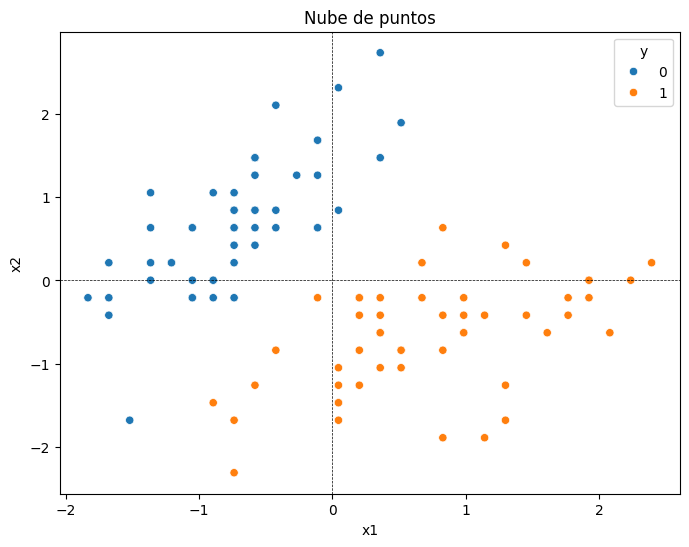

In [29]:
plot_manual(dataset_1)


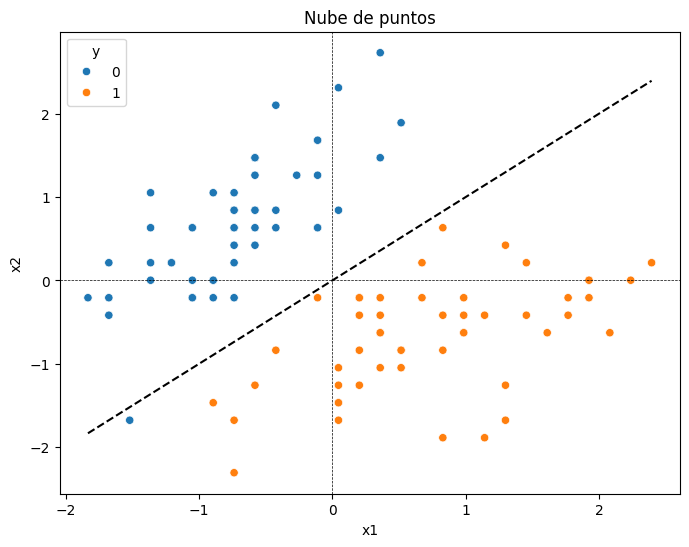

In [30]:
plot_manual(dataset_1, m=1, C=0)


In [ ]:
X = dataset_1[["x1", "x2"]]
y = dataset_1["y"]

svm = SVC(kernel='linear', C=100, random_state=SEMILLA)
svm.fit(X, y)

y_pred = svm.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f'Precisión sobre los datos de entrenamiento: {accuracy * 100:.2f}')

Precisión: 100.00


In [33]:
def plot_svm(data,svm):
    print(f"Score: {print(svm.score(X,y)*100)}")
    w = svm.coef_[0]
    b = svm.intercept_[0]
    
    x_vals = np.linspace(min(data['x1']), max(data['x1']), 100)
    y_hiperplano = -(w[0] / w[1]) * x_vals - b / w[1]
    
    
    plt.figure(figsize=(8, 6))
    
    sns.scatterplot(data = data,x='x1', y='x2', hue='y')
    plt.axhline(0,color='black',linewidth=0.5,linestyle='--')
    plt.axvline(0,color='black',linewidth=0.5,linestyle='--')
    
    plt.plot(x_vals, y_hiperplano, "k-", label="Hiperplano")
    plt.plot(x_vals, y_hiperplano + 1 / w[1], "r--", label="Márgen positivo")
    plt.plot(x_vals, y_hiperplano - 1 / w[1], "r--", label="Márgen negativo")
    
    plt.scatter(
        svm.support_vectors_[:, 0],
        svm.support_vectors_[:, 1],
        s=100,
        facecolors="none",
        edgecolors="k",
        label="Vectores de soporte"
    )
    plt.title("Hiperplano aprendido por la SVM")
    plt.legend()
    plt.show()

100.0
Score: None


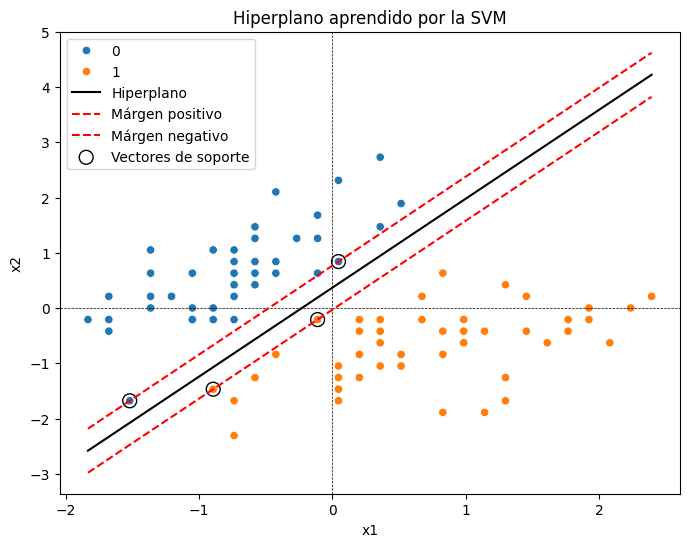

In [34]:
plot_svm(dataset_1, svm)

In [35]:
svm_1 = SVC(kernel='linear', C=1, random_state=SEMILLA)
svm_1.fit(X, y)

y_pred = svm_1.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f'Precisión sobre los datos de entrenamiento: {accuracy * 100:.2f}')

Precisión sobre los datos de entrenamiento: 99.00


99.0
Score: None


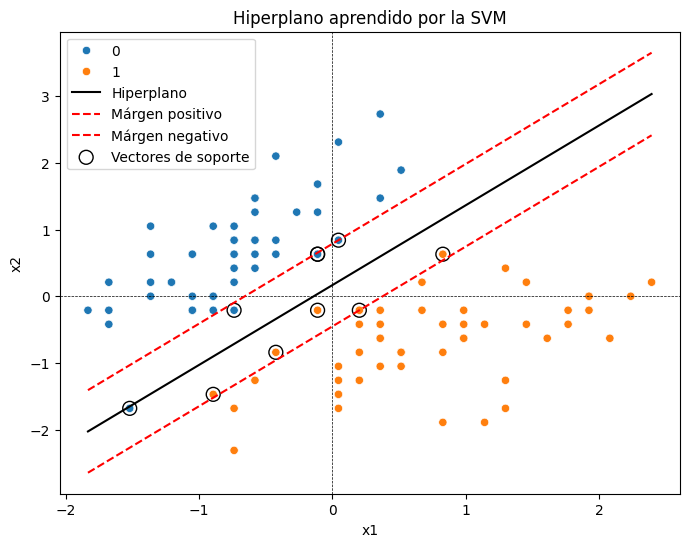

In [36]:
plot_svm(dataset_1, svm_1)

## 1.2. Problema cuasi-separable linealmente

In [11]:
dataset_2 = pd.read_csv("dataset_2.csv")

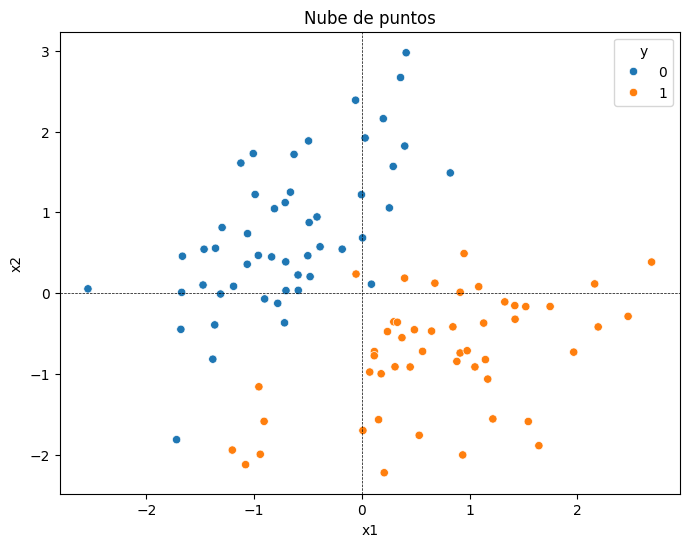

In [37]:
plot_manual(dataset_2)

In [48]:
def get_best_c(dataset):
    svc = SVC(kernel='linear', random_state=SEMILLA)
    X = dataset[["x1", "x2"]]
    y = dataset["y"]

    parametros={'C':[i*0.1 for i in range(1,1000)]}

    grid_search = GridSearchCV(
        estimator=svc,
        param_grid=parametros,
        cv=5,  
        verbose=1  # Muestra el progreso
    )
    grid_search.fit(X, y)

    best_C = grid_search.best_params_['C']

    print(f"Mejor valor de C: {best_C}")
    print(f"Mejor puntuación de validación cruzada: {grid_search.best_score_ * 100:.2f}%")
    return best_C


In [50]:
mejor_C = get_best_c(dataset_2)

Fitting 5 folds for each of 999 candidates, totalling 4995 fits
Mejor valor de C: 0.6000000000000001
Mejor puntuación de validación cruzada: 99.00%


99.0
Score: None


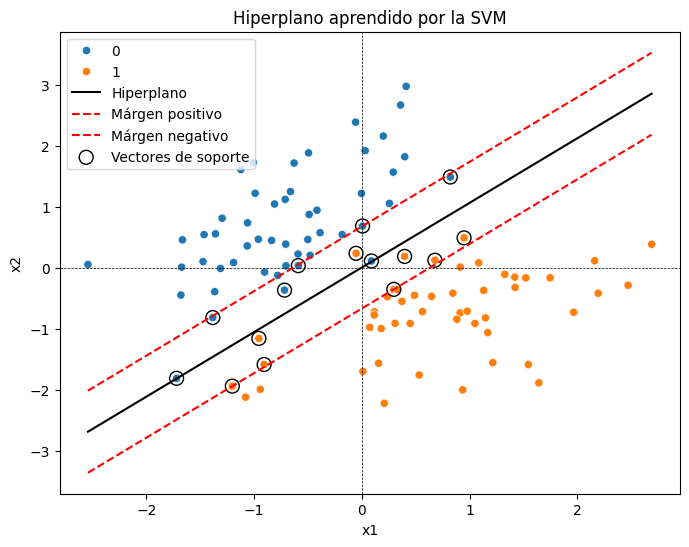

In [ ]:
svm_best = SVC(kernel='linear', C=mejor_C, random_state=SEMILLA)
svm_best.fit(X, y)
plot_svm(dataset_2, svm_best)

## 1.3. Problema no separable linealmente (I)

In [12]:
dataset_3 = pd.read_csv("dataset_3.csv")

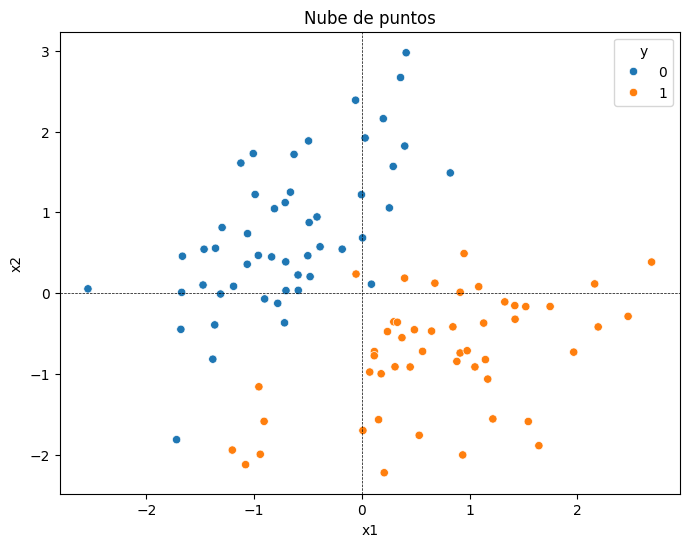

In [47]:
plot_manual(dataset_2)

Fitting 5 folds for each of 999 candidates, totalling 4995 fits
Mejor valor de C: 0.1
Mejor puntuación de validación cruzada: 87.00%
87.0
Score: None


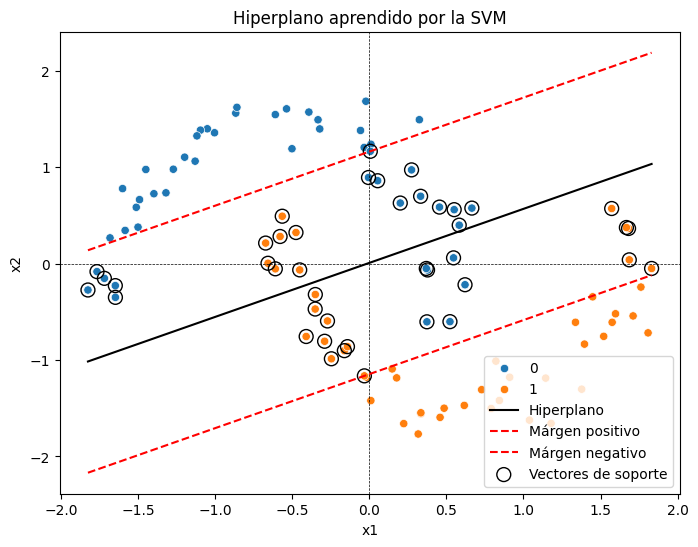

In [53]:
X = dataset_3[["x1", "x2"]]
y = dataset_3["y"]


mejor_C = get_best_c(dataset_3)
svm_best = SVC(kernel='linear', C=mejor_C, random_state=SEMILLA)
svm_best.fit(X, y)
plot_svm(dataset_3, svm_best)

In [56]:
def plot_svm_poly(data, svm,p=None):
    x_min, x_max = data["x1"].min() - 1, data["x1"].max() + 1
    y_min, y_max = data["x2"].min() - 1, data["x2"].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))

    if p!=None:

        # Crear DataFrame para predicción
        grid_points = np.c_[xx.ravel(), yy.ravel()]
        grid_df = pd.DataFrame(grid_points, columns=["x1", "x2"])
        
        # Predecir valores en cada punto de la cuadrícula
        decision_values = svm.decision_function(grid_df)
        Z = decision_values.reshape(xx.shape)
    else:
        Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
    
    # Graficar las regiones de decisión
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='black', linewidths=1)
    
    # Graficar puntos y vectores de soporte
    sns.scatterplot(data=data, x='x1', y='x2', hue='y')
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
    
    plt.scatter(
        svm.support_vectors_[:, 0],
        svm.support_vectors_[:, 1],
        s=100,
        facecolors='none',
        edgecolors='k',
        label='Vectores de soporte'
    )
    
    plt.title("Fronteras de decisión con kernel polinómico (grado=3)")
    plt.legend()
    plt.show()


/home/mateo/cosas_de_clase/AAS/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


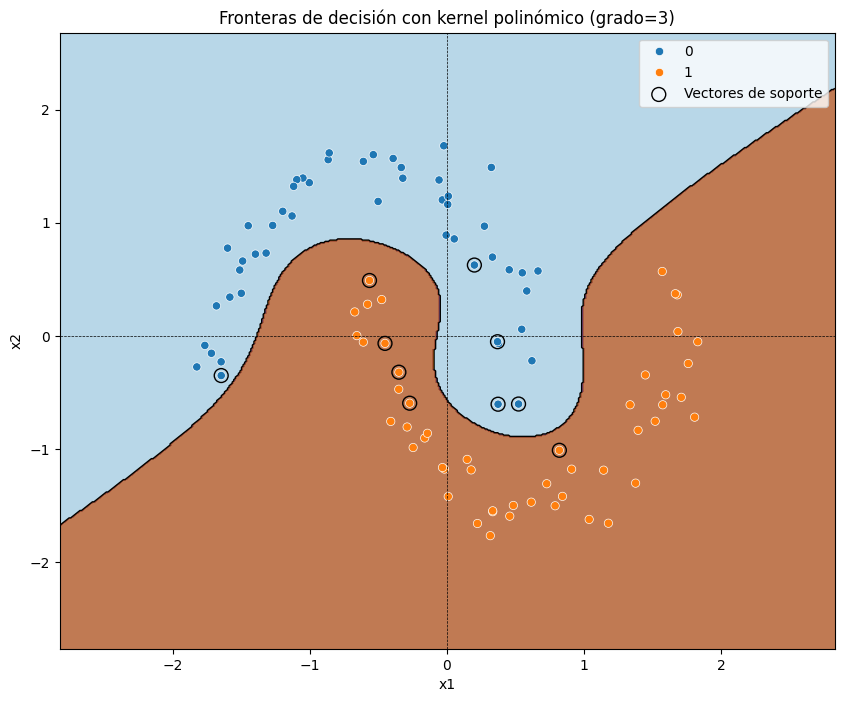

In [62]:
svm_poli = SVC(kernel='poly', degree=3, C=100, coef0=0.1, random_state=SEMILLA)
svm_poli.fit(X, y)
plot_svm_poly(dataset_3, svm_poli)

## 1.4. Problema no separable linealmente (II)

In [13]:
dataset_4 = pd.read_csv("dataset_4.csv")

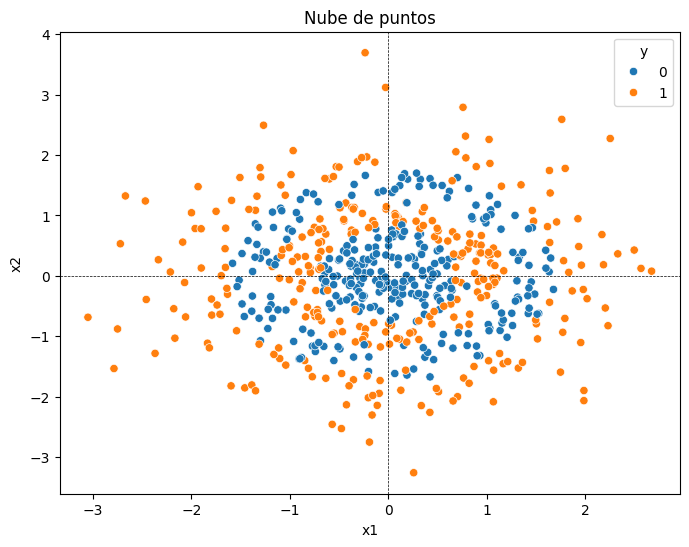

In [63]:
plot_manual(dataset_4)

Fitting 5 folds for each of 999 candidates, totalling 4995 fits
Mejor valor de C: 3.7
Mejor puntuación de validación cruzada: 55.50%
57.833333333333336
Score: None


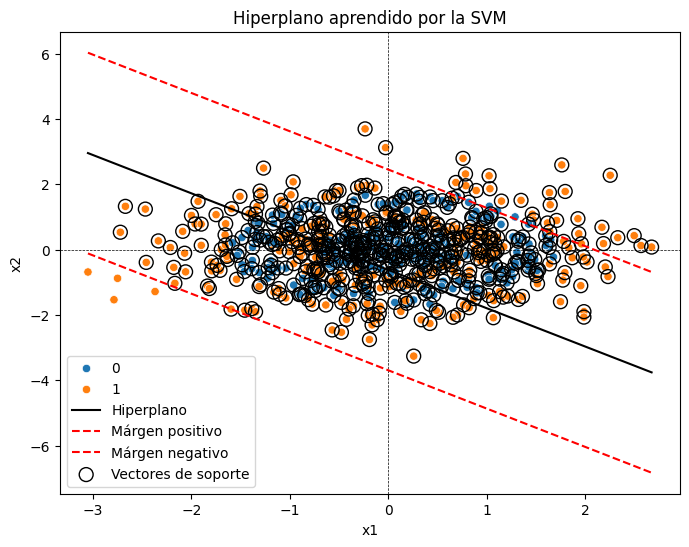

In [64]:
X = dataset_4[["x1", "x2"]]
y = dataset_4["y"]

mejor_C = get_best_c(dataset_4)
svm_best = SVC(kernel='linear', C=mejor_C, random_state=SEMILLA)
svm_best.fit(X, y)
plot_svm(dataset_4, svm_best)

/home/mateo/cosas_de_clase/AAS/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


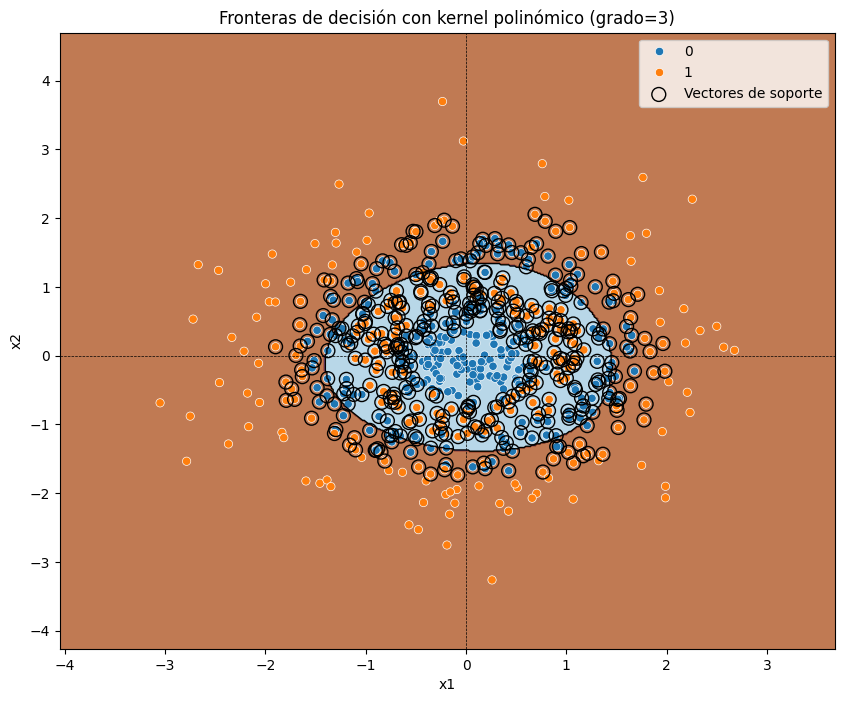

In [70]:
svm_poli = SVC(kernel='poly', degree=3, C=100, coef0=0.5, random_state=SEMILLA)
svm_poli.fit(X, y)
plot_svm_poly(dataset_4, svm_poli)

/home/mateo/cosas_de_clase/AAS/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


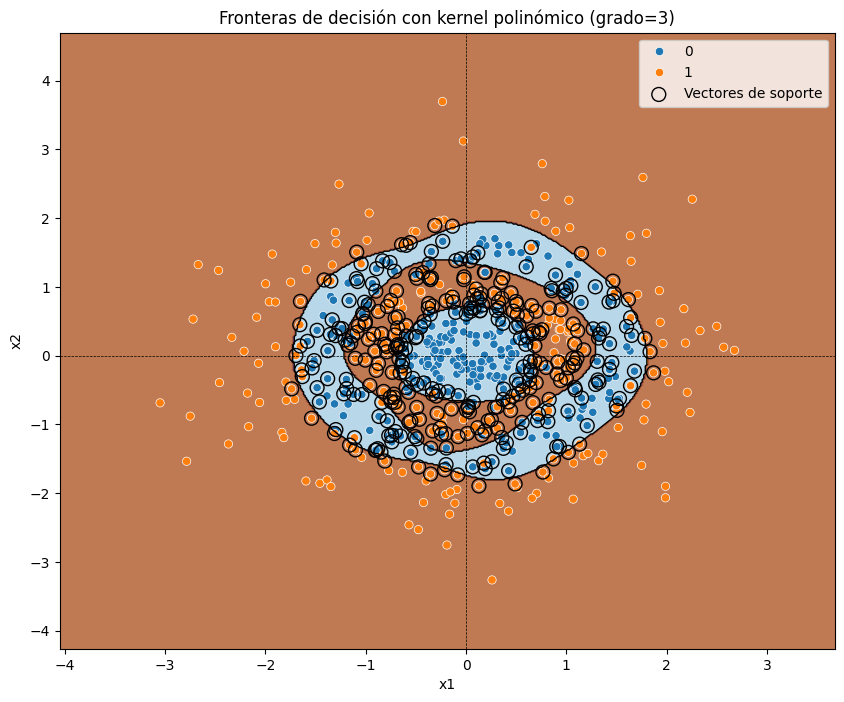

In [68]:
svm_radial = SVC(kernel='rbf', C=100, random_state=SEMILLA)
svm_radial.fit(X, y)
plot_svm_poly(dataset_4, svm_radial)

# 2. Caso práctico

## 2.1 Breast Cancer

In [91]:
bcd = pd.read_csv("breast-cancer-train.csv")

In [92]:
bcd.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [ ]:
bcd = bcd.drop(columns=['id'])
bcd['diagnosis'] = bcd['diagnosis'].map({'M': 0, 'B': 1})

bcd.drop_duplicates(inplace=True)

Simpimp = SimpleImputer(missing_values = np.nan,strategy = 'median')
bcd = Simpimp.fit_transform(bcd)
bcd = pd.DataFrame(bcd, columns=bcd.columns)

X = bcd.drop(columns=['diagnosis'])
y = bcd['diagnosis']

Precisión sobre los datos de entrenamiento: 94.99


In [118]:
svm_breast = SVC(kernel='rbf', C=100, random_state=SEMILLA)
svm_breast.fit(X, y)

y_pred = svm_breast.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f'Precisión sobre los datos de entrenamiento: {accuracy * 100:.2f}')

Precisión sobre los datos de entrenamiento: 94.99


In [99]:
y = np.ravel(y)

parametros = {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1]}
grid_search = GridSearchCV(
    estimator=SVC(kernel='rbf', random_state=SEMILLA),
    param_grid=parametros,
    cv=5,  
    verbose=1  
)

grid_search.fit(X, y)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Mejores parámetros: {best_params}")
print(f"Mejor puntuación de validación cruzada: {best_score * 100:.2f}%")


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Mejores parámetros: {'C': 1, 'gamma': 0.001}
Mejor puntuación de validación cruzada: 93.08%


In [116]:
parametros = {'C': [0.1 * i for i in range(1, 20)], 'coef0': [0.1 * i for i in range(1, 20)]}
grid_search = GridSearchCV(
    estimator=SVC(kernel='poly', random_state=SEMILLA),
    param_grid=parametros,
    cv=5,  
    verbose=1  
)


grid_search.fit(X, y)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Mejores parámetros: {best_params}")
print(f"Mejor puntuación de validación cruzada: {best_score * 100:.2f}%")

Fitting 5 folds for each of 361 candidates, totalling 1805 fits
Mejores parámetros: {'C': 0.5, 'coef0': 1.3}
Mejor puntuación de validación cruzada: 94.52%


## 2.2. Adult

In [15]:
add = pd.read_csv("adult-train.csv")

In [ ]:
add.drop_duplicates(inplace=True)
X2 = add.drop(columns=['outputClass']) 
y2 = add['outputClass'].map({'<=50K': 1, '>50K': 0})
X2 = X2.drop(columns=['workclass', 'occupation', "nativeCountry"])

# Identificar columnas categóricas y numéricas
categoricas = X2.select_dtypes(include=['object']).columns
numericas = X2.select_dtypes(include=np.number).columns

# Aplicamos One-Hot Encoding a las variables categóricas. Esto crea una nueva
# columna binaria para cada categoría posible.
X2 = pd.get_dummies(X2, columns=categoricas, drop_first=True)


In [119]:
svm_breast = SVC(kernel='rbf', C=100, random_state=SEMILLA)
svm_breast.fit(X2, y2)

y_pred = svm_breast.predict(X)
accuracy = accuracy_score(y2, y_pred)
print(f'Precisión sobre los datos de entrenamiento: {accuracy * 100:.2f}')

ValueError: could not convert string to float: 'State-gov'